In [1]:
#let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

C:\Users\arunn\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step3:collecting df

In [2]:
#load the data
df = pd.read_csv('mcdonalds.csv')

# Step4 exploring df

In [3]:
#top 5 rows 
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
#  bottom 5 rows 
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
#the shape of dfset
print(df.shape)

(1453, 15)


In [6]:
#check details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# unique value
df.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [8]:
#insights of the df for numerical column
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
#insights of the df for all dfset
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [10]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [11]:
#all columns name
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [12]:
#count of missing values.
df.isna().sum()
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## convert categorical column to numeric

In [13]:
df['yummy'].value_counts()




yummy
Yes    803
No     650
Name: count, dtype: int64

In [14]:
df['convenient'].value_counts()

convenient
Yes    1319
No      134
Name: count, dtype: int64

In [15]:
df['fattening'].value_counts()

fattening
Yes    1260
No      193
Name: count, dtype: int64

In [16]:
df['greasy'].value_counts()

greasy
Yes    765
No     688
Name: count, dtype: int64

In [17]:
df['fast'].value_counts()

fast
Yes    1308
No      145
Name: count, dtype: int64

In [18]:
df['cheap'].value_counts()

cheap
Yes    870
No     583
Name: count, dtype: int64

In [19]:
df['tasty'].value_counts()

tasty
Yes    936
No     517
Name: count, dtype: int64

In [20]:
df['expensive'].value_counts()

expensive
No     933
Yes    520
Name: count, dtype: int64

In [21]:
df['healthy'].value_counts()

healthy
No     1164
Yes     289
Name: count, dtype: int64

In [22]:
df['disgusting'].value_counts()

disgusting
No     1100
Yes     353
Name: count, dtype: int64

In [23]:
df["yummy"]= df["yummy"].replace({'Yes':1, 'No':0})
df["convenient"] = df["convenient"].replace({'Yes':1, 'No':0})
df["spicy"] = df["spicy"].replace({'Yes':1, 'No':0})
df["fattening"] = df["fattening"].replace({'Yes':1, 'No':0})
df["greasy"] = df["greasy"].replace({'Yes':1, 'No':0})
df["fast"] = df["fast"].replace({'Yes':1, 'No':0})
df["cheap"] = df["cheap"].replace({'Yes':1, 'No':0})
df["tasty"] = df["tasty"].replace({'Yes':1, 'No':0})
df["expensive"] = df["expensive"].replace({'Yes':1, 'No':0})
df["healthy"] = df["healthy"].replace({'Yes':1, 'No':0})
df["disgusting"] = df["disgusting"].replace({'Yes':1, 'No':0})

df.head()

C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\2134531964.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\2134531964.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\2134531964.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [24]:
df1= df.iloc[:,0:11]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [26]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [27]:
scaled_df = scalar.fit_transform(df1)


In [30]:
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\1637828378.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='PCA1', ylabel='PCA2'>

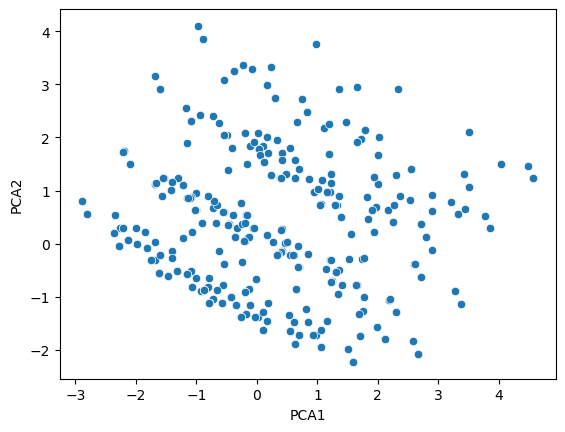

In [33]:
#Visualization of PCA1 and PCA2
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

<Axes: >

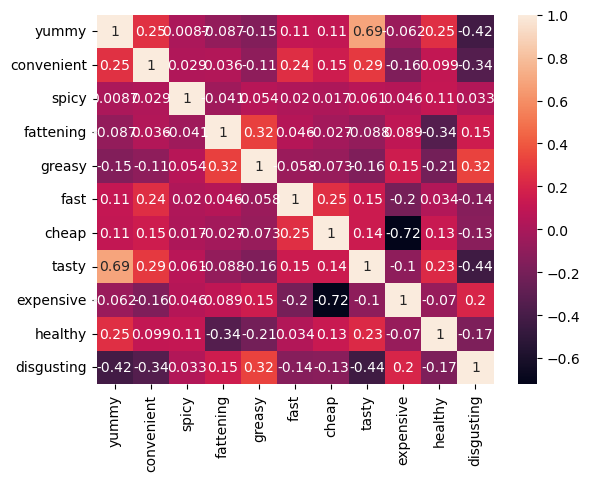

In [34]:
sns.heatmap(df1.corr(), annot=True)

# Step5 :Extracting  segments

In [39]:
# pip install yellowbrick


C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

C:\Users\a

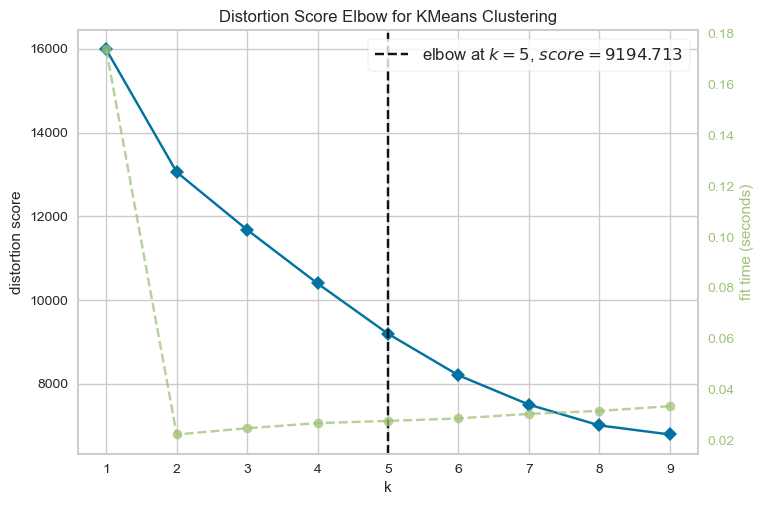

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



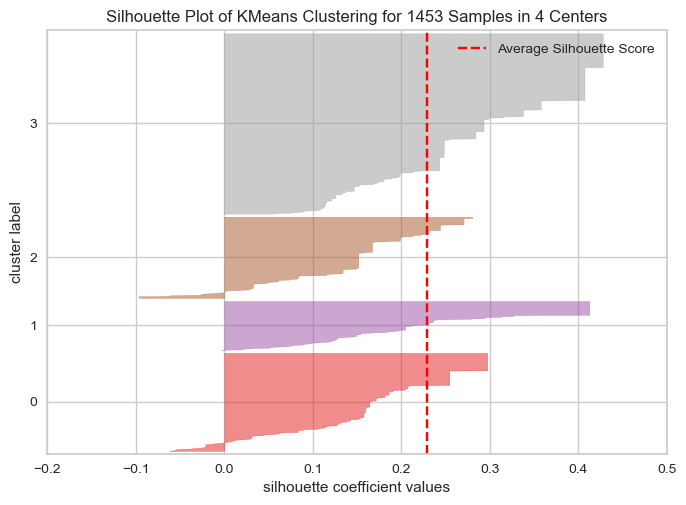

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)    # Fit the df to the visualizer
visualizer.show()    # Finalize and render the figure

In [43]:
#assign cluster number with there type in PCA
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



In [44]:
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,1
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,3
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,3
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,3
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,1


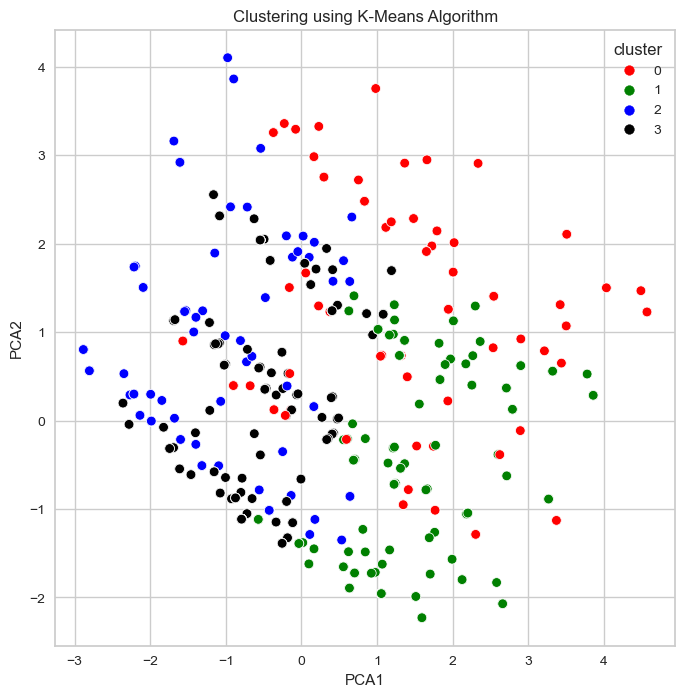

In [46]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [48]:
# Creating a target column "Cluster" for storing the cluster segment
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\arunn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,3


<Axes: xlabel='cluster', ylabel='count'>

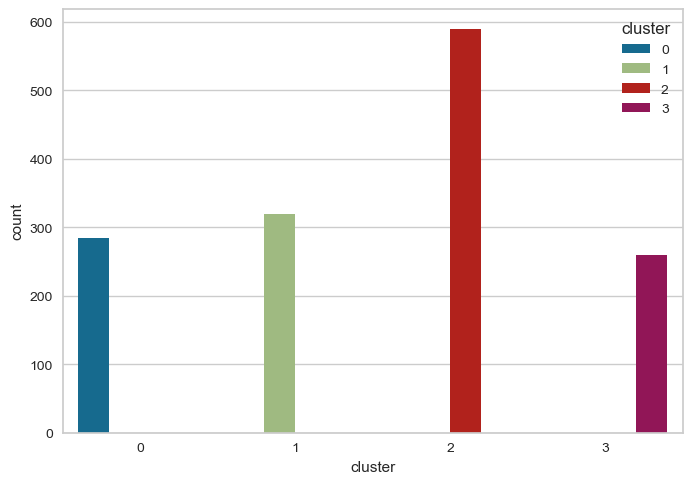

In [50]:
#analysis cluster's
sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")

# step 6 : Profiling segments 

In [51]:
#grouping with cluster 1
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,0
10,0,1,0,1,0,1,1,0,0,0,1,0
18,0,0,0,1,1,1,1,0,1,0,1,0
33,0,1,0,1,1,1,1,0,0,0,1,0
35,0,1,0,1,1,1,1,0,0,0,1,0


C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\2670649549.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




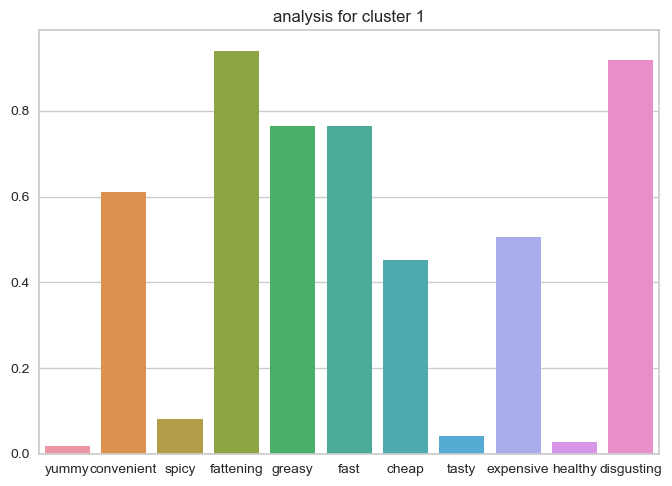

In [53]:
#analysis for cluster 1
ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 1')
plt.show()

* ## by this anylysis we can say that this group 1 (more:yummy,convenient ,fattening ,fast , cheap , testy) with (less: spicy,expensive,healthy) this type less disgusting

In [54]:
#grouping with cluster 2

cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1
9,1,1,0,1,1,1,0,1,1,0,0,1
11,1,1,0,1,1,1,0,1,1,0,1,1
14,0,1,0,1,0,1,0,0,1,0,0,1


C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\2696822422.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




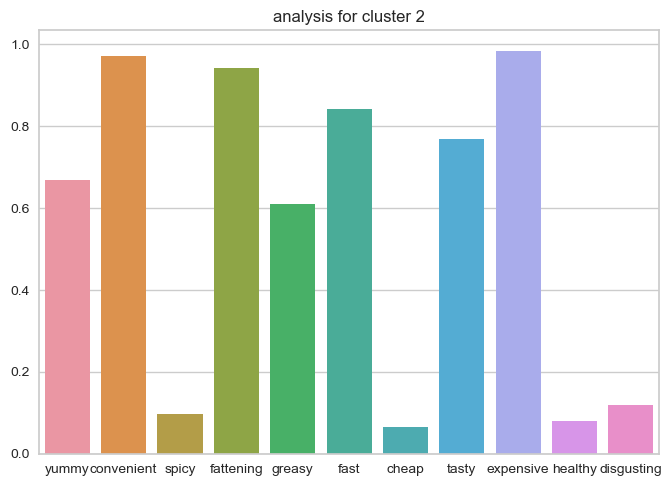

In [56]:
#analysis for cluster 2

ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()

* ## by this anylysis we can say that this group (more:convenient ,fattening,greasy ,fast , cheap , testy) with (less: spicy,testy,healthy) this type mostly disgusting

In [57]:
#grouping with cluster 3

cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
3,1,1,0,1,1,1,1,1,0,0,1,2
5,1,1,0,1,0,1,1,1,0,0,0,2
7,1,1,0,1,1,1,1,1,0,0,0,2
12,0,1,0,1,0,1,1,0,0,0,0,2


C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\2121606257.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




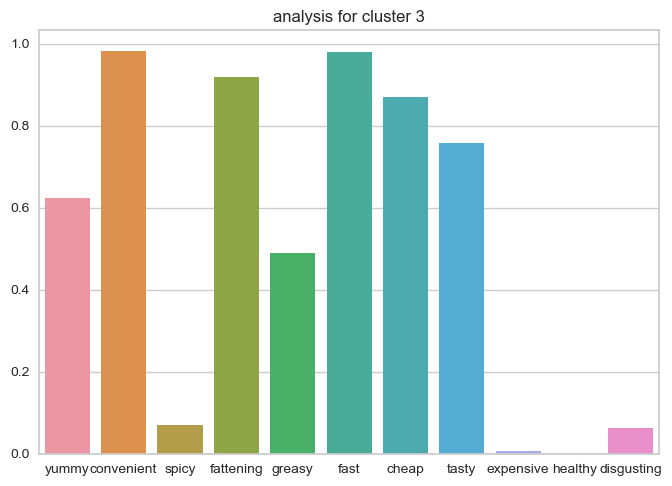

In [59]:
#analysis for cluster 3

ax = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()

* ## by this anylysis we can say that this type (more:yummy ,convenient ,fattening,greasy ,fast,expensive , testy) with (less: spicy,cheap,healthy) this type less disgusting

In [60]:
#grouping with cluster 4

cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
4,0,1,0,1,1,1,1,0,0,1,0,3
6,1,1,1,1,0,1,0,1,1,1,0,3
13,1,1,0,1,0,1,0,1,1,1,0,3
24,1,1,0,1,0,1,1,1,0,1,0,3
27,0,1,0,1,1,1,0,1,0,1,0,3


C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\3985243056.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




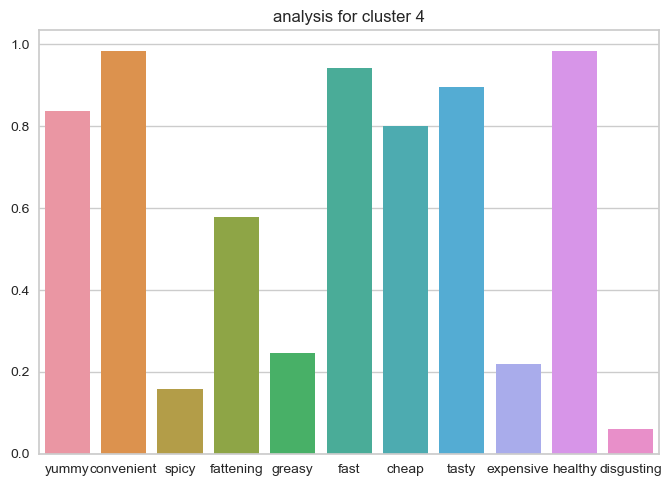

In [64]:
#analysis for cluster 4

ax = sns.barplot(data=cluster_4_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 4')
plt.show()

* ## by this anylysis we can say that this type (more:yummy ,convenient ,fast,,cheap,healthy , testy) with (less: spicy,fattening,greasy,expensive) this type less disgusting

# Step:7 Describining Segments

In [65]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [68]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


In [69]:
df_new['VisitFrequency'].value_counts()


VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [70]:
df_new["VisitFrequency"]= df_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})


C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\1026508276.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [71]:
df_new['Like'].value_counts()


Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [72]:
df_new['Gender'].value_counts()


Gender
Female    788
Male      665
Name: count, dtype: int64

In [73]:
df_new["Like"]= df_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})


C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\4171816834.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [74]:
df_new["Gender"]= df_new["Gender"].replace({'Female':0, 'Male':1})

C:\Users\arunn\AppData\Local\Temp\ipykernel_17400\2483641359.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [75]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,2
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,1
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,1
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,3


In [76]:
from statsmodels.graphics.mosaicplot import mosaic


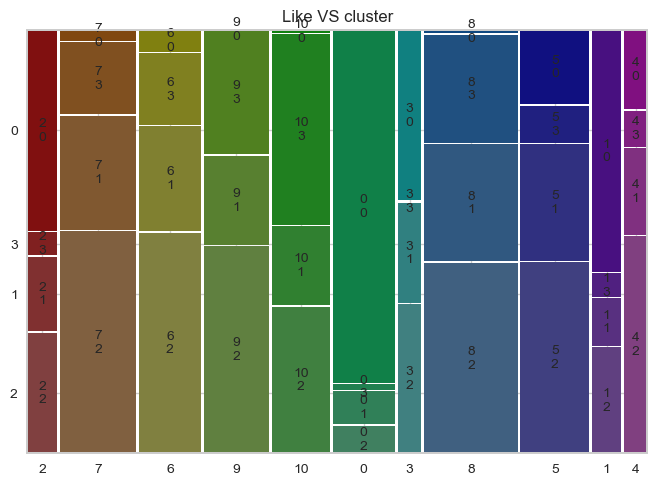

In [77]:
mosaic(df_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

##  {'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10}

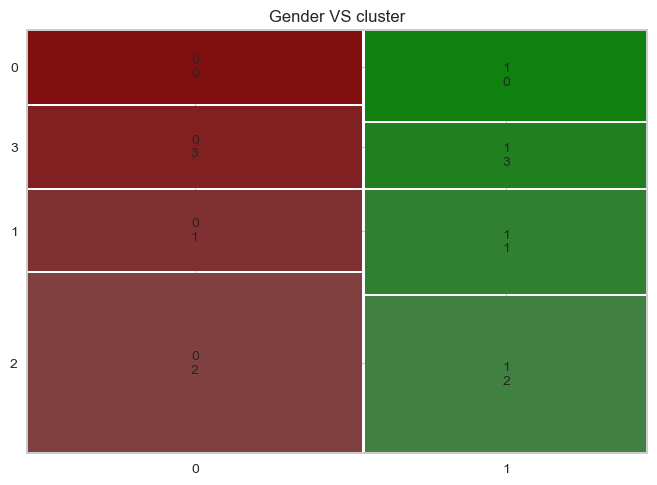

In [78]:
mosaic(df_new, ['Gender','cluster'],title='Gender VS cluster')
plt.show()

## 'Female':0, 'Male':1
## {'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10}

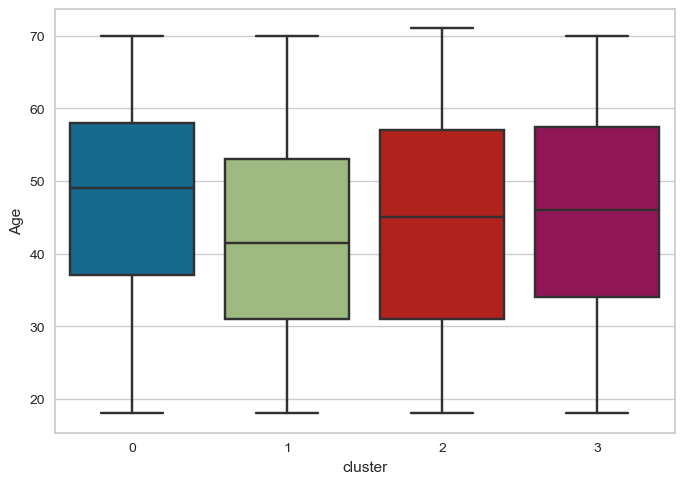

In [79]:
# Visual Python: Visualization > Seaborn
sns.boxplot(x=df_new['cluster'], y=df_new['Age'])
plt.show()

# Step 8: Selecting Target Segments

In [80]:
#Split dfset
X = df_new.drop(['cluster'],axis=1)
y= df_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [81]:
X_test.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
742,0,1,0,1,1,1,1,0,0,0,0,7,63,2,0
472,1,1,0,1,1,1,1,1,0,0,0,7,21,2,0
1197,0,1,0,1,1,1,0,0,1,0,1,0,66,1,0
603,0,1,0,1,0,1,1,0,0,0,1,1,60,0,0
75,0,1,0,1,1,0,0,0,1,0,1,4,40,2,1


In [82]:
y_test.head()


,cluster
742,2
472,2
1197,0
603,0
75,0


In [83]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

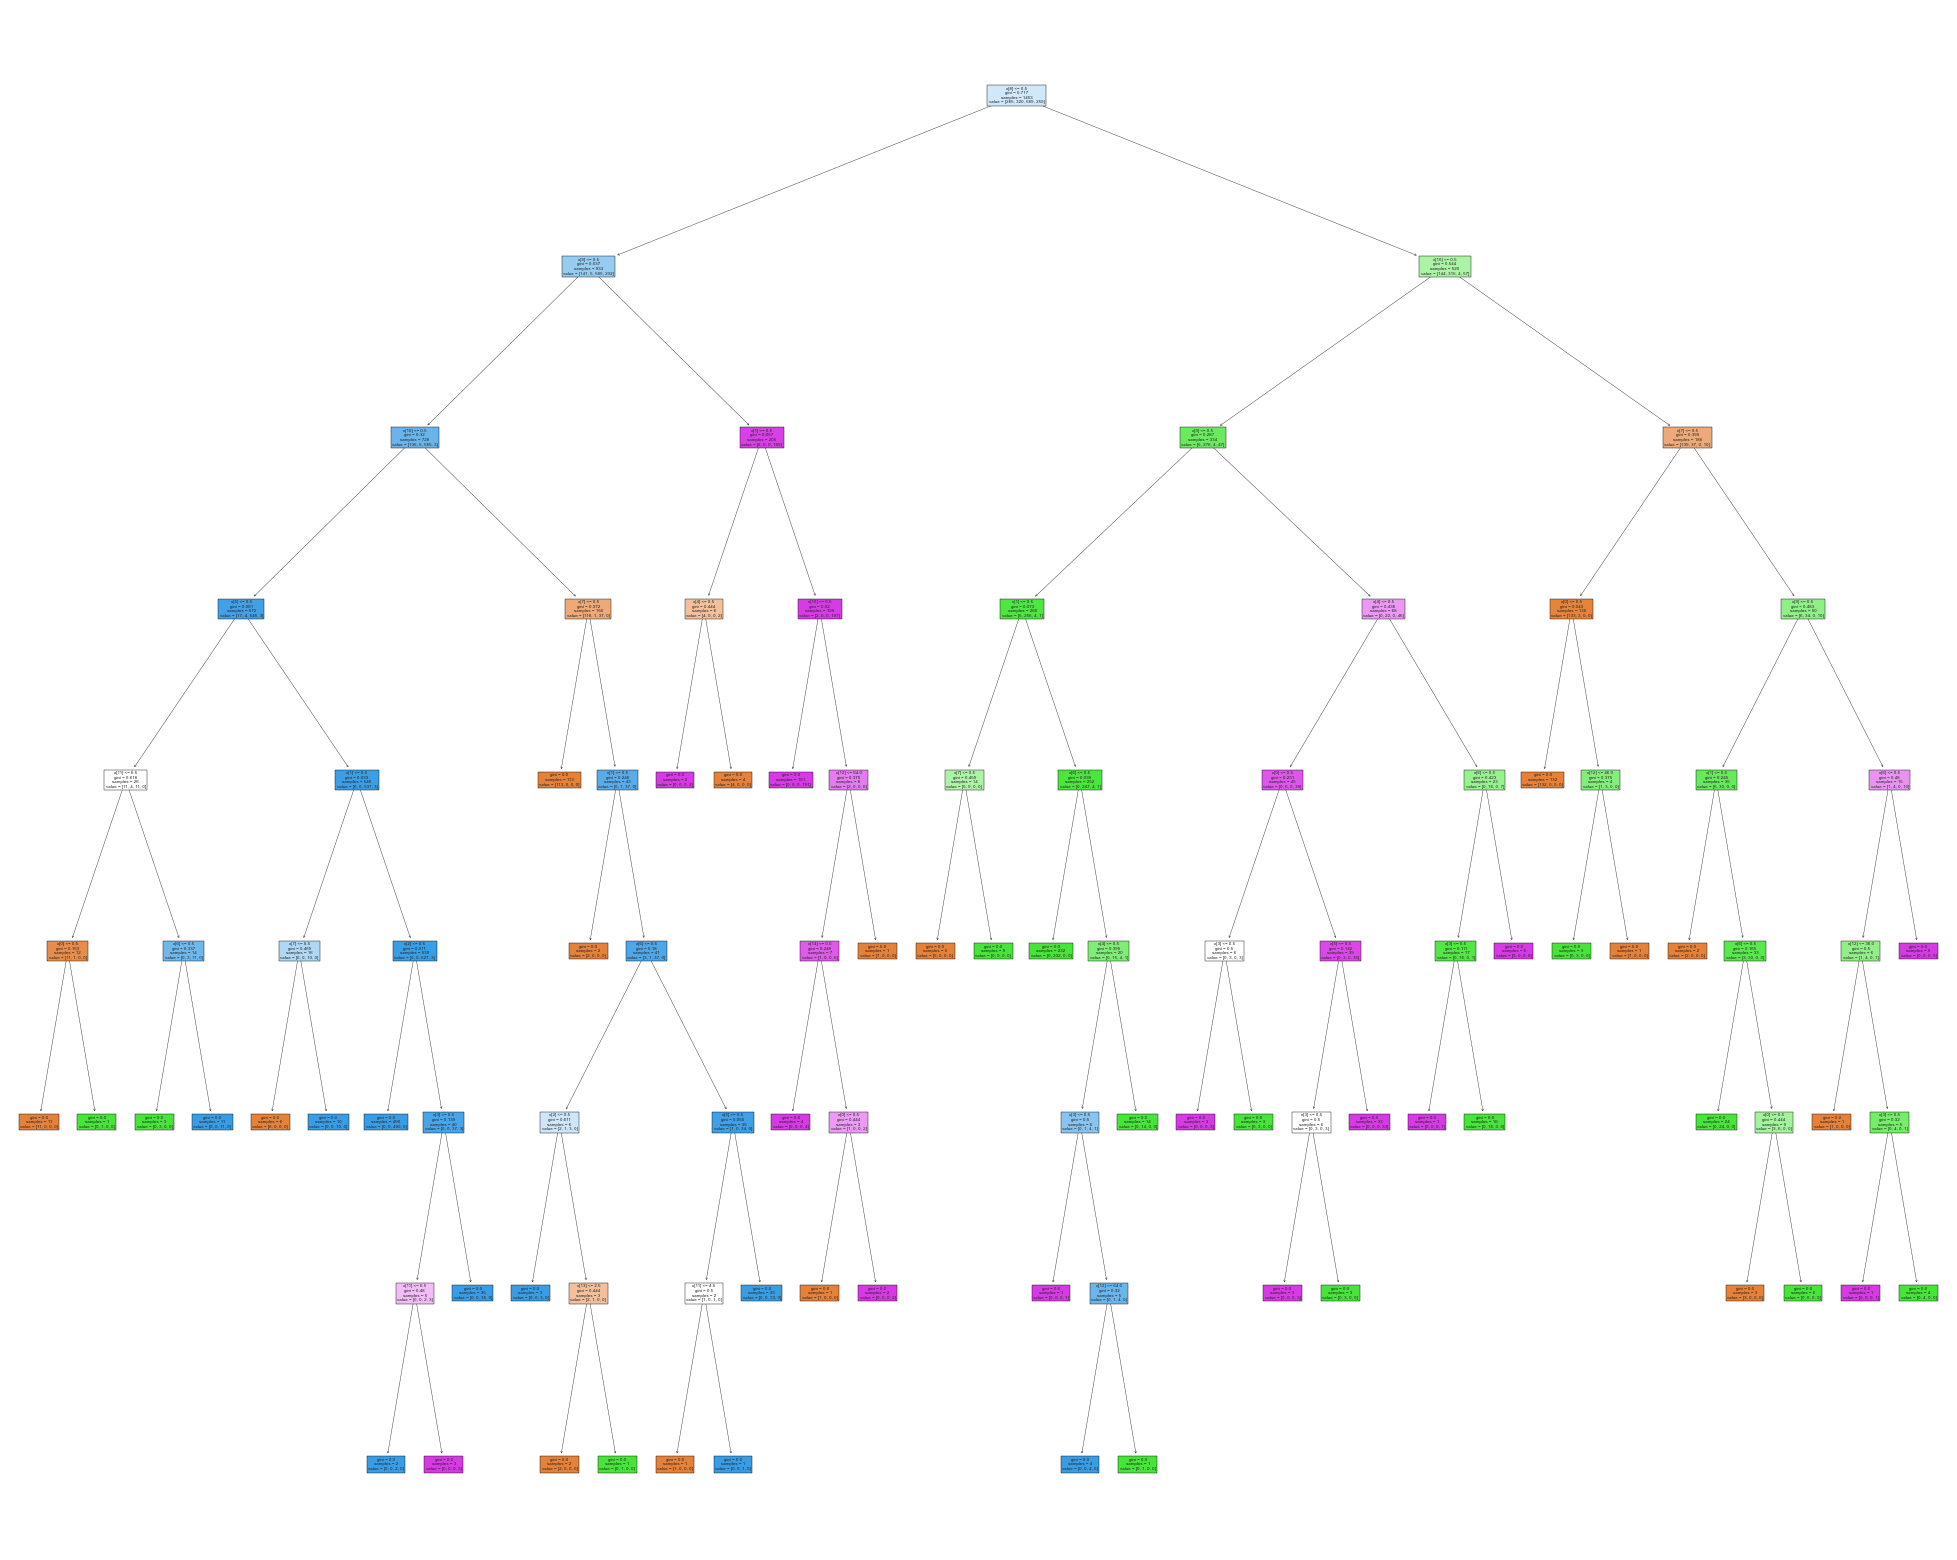

In [84]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   filled=True)

In [85]:
# Visual Python: Visualization > Plotly
fig = px.funnel(x=df_new['VisitFrequency'], y=df_new['Like'], color=df_new['Like'], title='VisitFrequency vs Like', labels={ 'x': 'VisitFrequency', 'y': 'Like' })
fig.show()

C:\Users\arunn\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



* visitor frequency is more Once in month and they like this(8* - 10*)

### * 'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10}


### * 'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5}

# Step 9 : Customising the marketing mix

In Step 9 the marketing mix is designed. If, for example, McDonald’s managers
decide to focus on segment 3 (young customers who like McDonald’s, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this
segment (4Ps: Price). The advantage of such an approach might be that members
of segment 3 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald’s
range of products. To not cannibalise the main range, the product features of the
MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next,
communication channels would have to be identified which are heavily used by
members of segment 3 to communicate the availability of the MCSUPERBUDGET
line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same
given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s
management could consider having a MCSUPERBUDGET lane where the wait in the
queue might be slightly longer in an attempt not to cannibalise the main product line.


# Step 10 :Evaluation and monitoring

In [86]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [87]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 77   3   1   1]
 [  2  94   2   0]
 [  1   2 172   0]
 [  2   2   0  77]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        82
           1       0.93      0.96      0.94        98
           2       0.98      0.98      0.98       175
           3       0.99      0.95      0.97        81

    accuracy                           0.96       436
   macro avg       0.96      0.96      0.96       436
weighted avg       0.96      0.96      0.96       436



In [90]:
# import pickle
# filename = 'model.pkl'
# pickle.dump(model, open(filename, 'wb'))
  
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
#print(result,'% Acuuracy')

NameError: name 'Acuuracy' is not defined